In [1]:
#Step 1: Setup
# Clone the repository
!git clone https://github.com/IndulekhaKP/credit-card-fraud-detection.git

# Navigate to the project folder
%cd credit-card-fraud-detection


Cloning into 'credit-card-fraud-detection'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 47 (delta 3), reused 36 (delta 3), pack-reused 11 (from 1)
Receiving objects: 100% (47/47), 49.00 MiB | 13.61 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (28/28), done.
/content/credit-card-fraud-detection


In [2]:
#Step 2: Load the Data
import pandas as pd

# Load the dataset
data = pd.read_csv("data/creditcard.csv")
print("Data loaded successfully!")
print(data.head())

# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']


Data loaded successfully!
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

      

In [3]:
#Step 3: Preprocess the Data
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data preprocessed successfully!")


Data preprocessed successfully!


In [4]:
#Step 4: Load Serialized Models
import pickle

# Load Logistic Regression Model
with open("models/logistic_model.pkl", "rb") as file:
    logistic_model = pickle.load(file)

# Load Random Forest Model
with open("models/random_forest_model.pkl", "rb") as file:
    random_forest_model = pickle.load(file)

# Load XGBoost Model
with open("models/xgboost_model.pkl", "rb") as file:
    xgboost_model = pickle.load(file)

print("Models loaded successfully!")


Models loaded successfully!


In [5]:
#Step 5: Make Predictions

# Logistic Regression Predictions
logistic_predictions = logistic_model.predict(X_scaled)

# Random Forest Predictions
random_forest_predictions = random_forest_model.predict(X_scaled)

# XGBoost Predictions
xgboost_predictions = xgboost_model.predict(X_scaled)

print("Predictions generated successfully!")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predictions generated successfully!


In [6]:
#Step 6: Evaluate the Models

from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y, logistic_predictions))
print("Classification Report:\n", classification_report(y, logistic_predictions))

# Random Forest Evaluation
print("Random Forest:")
print("Accuracy:", accuracy_score(y, random_forest_predictions))
print("Classification Report:\n", classification_report(y, random_forest_predictions))

# XGBoost Evaluation
print("XGBoost:")
print("Accuracy:", accuracy_score(y, xgboost_predictions))
print("Classification Report:\n", classification_report(y, xgboost_predictions))


Logistic Regression:
Accuracy: 0.9765595648983346
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.06      0.92      0.12       492

    accuracy                           0.98    284807
   macro avg       0.53      0.95      0.55    284807
weighted avg       1.00      0.98      0.99    284807

Random Forest:
Accuracy: 0.9994733275516402
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.95      0.73      0.83       492

    accuracy                           1.00    284807
   macro avg       0.98      0.87      0.91    284807
weighted avg       1.00      1.00      1.00    284807

XGBoost:
Accuracy: 0.9994417272047387
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.83      0.85

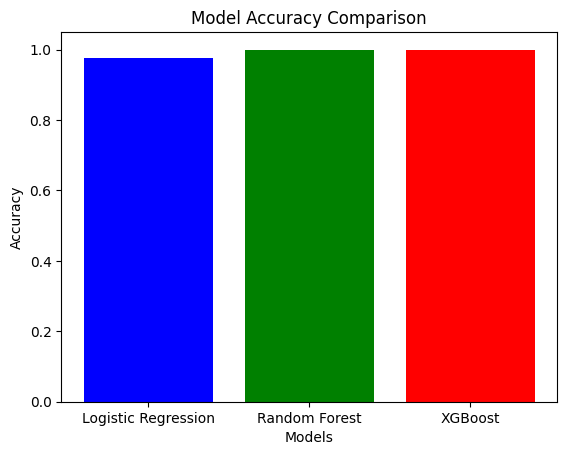

In [7]:
#Step 7: Visualize Results

import matplotlib.pyplot as plt

# Accuracy comparison
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y, logistic_predictions),
    accuracy_score(y, random_forest_predictions),
    accuracy_score(y, xgboost_predictions)
]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


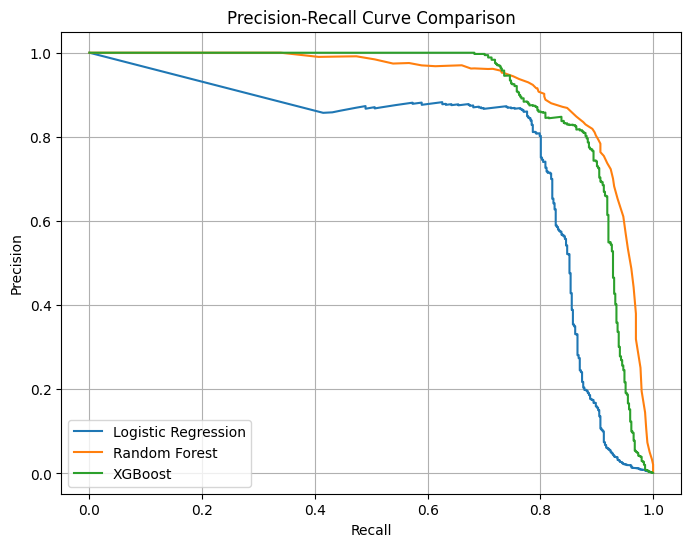

In [8]:
#Step 7: Visualize Results : Generate precision-recall curves for all models

from sklearn.metrics import precision_recall_curve

# Generate precision-recall curves for all models
plt.figure(figsize=(8, 6))

# Logistic Regression
precision, recall, _ = precision_recall_curve(y, logistic_model.predict_proba(X_scaled)[:, 1])
plt.plot(recall, precision, label='Logistic Regression')

# Random Forest
precision, recall, _ = precision_recall_curve(y, random_forest_model.predict_proba(X_scaled)[:, 1])
plt.plot(recall, precision, label='Random Forest')

# XGBoost
precision, recall, _ = precision_recall_curve(y, xgboost_model.predict_proba(X_scaled)[:, 1])
plt.plot(recall, precision, label='XGBoost')

# Plot settings
plt.title("Precision-Recall Curve Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


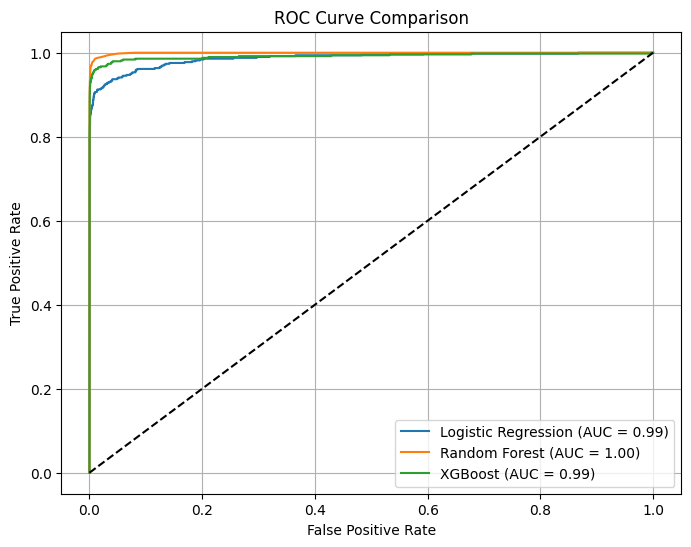

In [9]:
#Step 7: Visualize Results : Generate ROC curves for all models

from sklearn.metrics import roc_curve, auc

# Generate ROC curves for all models
plt.figure(figsize=(8, 6))

# Logistic Regression
fpr, tpr, _ = roc_curve(y, logistic_model.predict_proba(X_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')

# Random Forest
fpr, tpr, _ = roc_curve(y, random_forest_model.predict_proba(X_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

# XGBoost
fpr, tpr, _ = roc_curve(y, xgboost_model.predict_proba(X_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Baseline
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


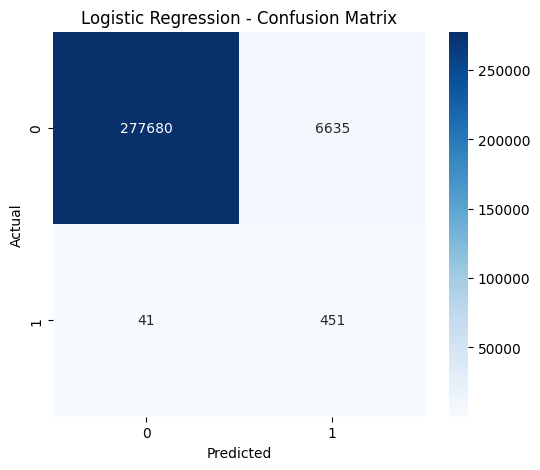

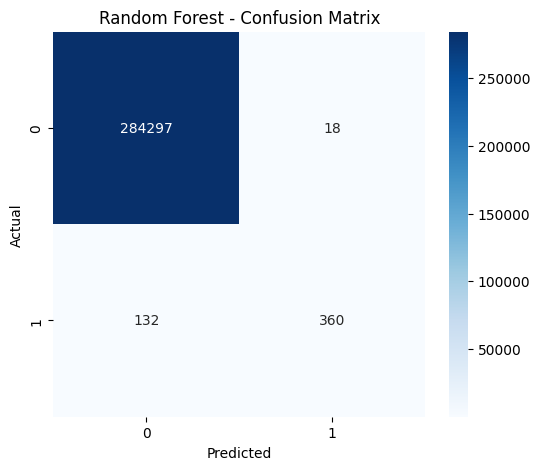

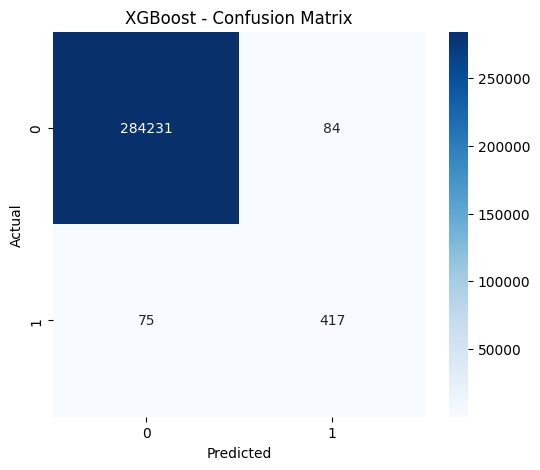

In [10]:
# plot confusion matrix of all models

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Confusion Matrices for each model
plot_confusion_matrix(y, logistic_predictions, "Logistic Regression - Confusion Matrix")
plot_confusion_matrix(y, random_forest_predictions, "Random Forest - Confusion Matrix")
plot_confusion_matrix(y, xgboost_predictions, "XGBoost - Confusion Matrix")


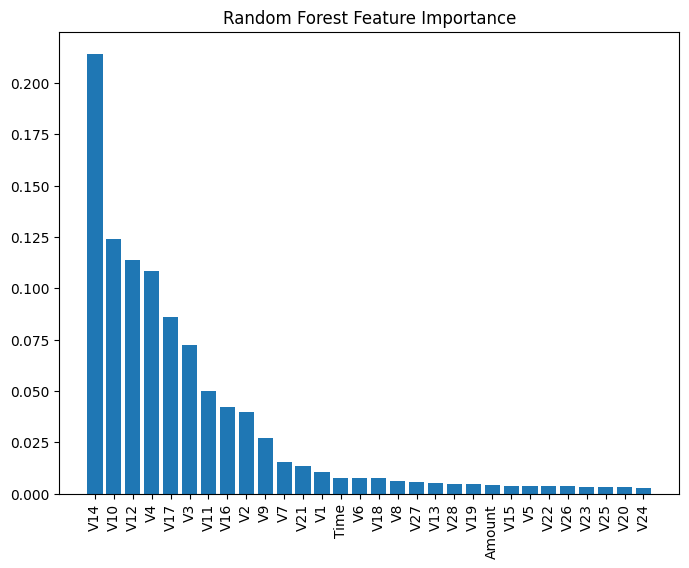

In [11]:
# Random Forest Feature Importance
import numpy as np

feature_importance_rf = random_forest_model.feature_importances_
indices_rf = np.argsort(feature_importance_rf)[::-1]
features = X.columns

plt.figure(figsize=(8, 6))
plt.bar(range(len(features)), feature_importance_rf[indices_rf], align="center")
plt.xticks(range(len(features)), features[indices_rf], rotation=90)
plt.title("Random Forest Feature Importance")
plt.show()


<Figure size 800x600 with 0 Axes>

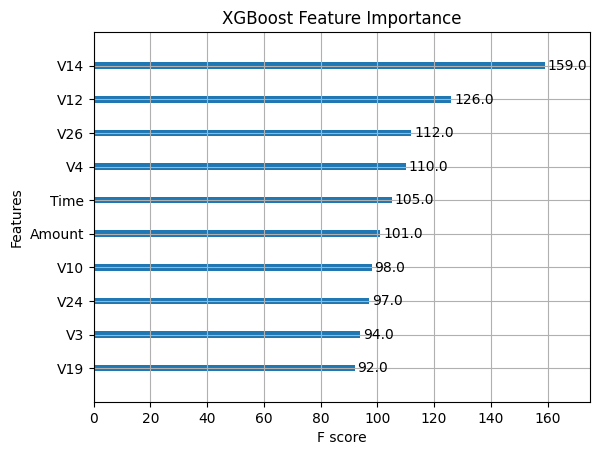

In [12]:
# XGBoost Feature Importance
from xgboost import plot_importance

plt.figure(figsize=(8, 6))
plot_importance(xgboost_model, max_num_features=10, importance_type="weight")
plt.title("XGBoost Feature Importance")
plt.show()


In [13]:
import pandas as pd

# Collect metrics for all models
metrics = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y, logistic_predictions),
        accuracy_score(y, random_forest_predictions),
        accuracy_score(y, xgboost_predictions),
    ],
    "Precision": [
        classification_report(y, logistic_predictions, output_dict=True)["1"]["precision"],
        classification_report(y, random_forest_predictions, output_dict=True)["1"]["precision"],
        classification_report(y, xgboost_predictions, output_dict=True)["1"]["precision"],
    ],
    "Recall": [
        classification_report(y, logistic_predictions, output_dict=True)["1"]["recall"],
        classification_report(y, random_forest_predictions, output_dict=True)["1"]["recall"],
        classification_report(y, xgboost_predictions, output_dict=True)["1"]["recall"],
    ],
    "F1-Score": [
        classification_report(y, logistic_predictions, output_dict=True)["1"]["f1-score"],
        classification_report(y, random_forest_predictions, output_dict=True)["1"]["f1-score"],
        classification_report(y, xgboost_predictions, output_dict=True)["1"]["f1-score"],
    ],
}

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.976560   0.063647  0.916667  0.119029
1        Random Forest  0.999473   0.952381  0.731707  0.827586
2              XGBoost  0.999442   0.832335  0.847561  0.839879
